# SISTEMA DE INFORMAÇÃO DE ATENÇÃO BÁSICA - CADASTRAMENTO FAMILIAR
## Anos : 2003 até 2015
### Fonte: DATASUS (http://www2.datasus.gov.br)

# Dados utilizados
#### Atenção Básica - Saúde da Família - Cadastramento Famíliar - 2003 até 2015
#### População Residente por Unidade da Federação segundo Município - 2003 até 2015
#### Renda média domic. per capita segundo Município - Censo 2010
#### Shapefile com os municípios do estado de São Paulo

# Programas utilizados
#### Python ( Linguagem de programação)
#### Jupyter notebook (aplicação para desenvolvimento)
#### Pandas(Biblioteca python para análise de dados)
#### Geopandas(Biblioteca python para análise de dados geográficos)


# Metodologia 
### Importação dos arquivos contendo os dados para o Python
### Criação do arquivo com a união dos dados tabulares e geográficos
### Criação dos índices:
#### - Famílias atendidas/População em 2014
#### - Famílias atendidas/População em 2003 - Famílias atendidas/População em 2014
#### - Índice de crescimento sobre famílias atendidas pela saúde da família entre 2003 e 2014 (2014 - 2003)
#### - Índice de Crescimento Populacional Entre 2003 e 2014 (2014 - 2003)

In [611]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point
import pysal

In [612]:
colunas = ('nome renda2010').split()

renda2010 = pd.read_csv('./Renda/2010.csv', sep=';', encoding='ANSI', engine='python')
renda2010.columns = colunas

listaMunicipio = []

for item in renda2010['nome']:
    listaMunicipio.append(item[7:])
    
renda2010['nome'] = listaMunicipio    

renda2010.nome = renda2010.nome.str.upper()
#renda2010.sort_values(by='renda2010', ascending = False)

In [613]:
colunas = ('nome familias2003').split()
df2003 = pd.read_csv('./Familia/2003.csv', sep=';', encoding='ANSI')
df2003.columns = colunas

listaMunicipio = []

for item in df2003['nome']:
    listaMunicipio.append(item[7:])
    
df2003['nome'] = listaMunicipio   

df2003.nome = df2003.nome.str.upper()

In [614]:
colunas = ('nome familias2014').split()
df2014 = pd.read_csv('./Familia/2014.csv', sep=';', encoding='ANSI')
df2014.columns = colunas

listaMunicipio = []

for item in df2014['nome']:
    listaMunicipio.append(item[7:])
    
df2014['nome'] = listaMunicipio 

df2014.nome = df2014.nome.str.upper()

In [615]:
colunas = ('nome populacao2003 apagar').split()

populacao2003 = pd.read_csv('./População/2003.csv', sep=';', encoding='ANSI', engine='python')
populacao2003.columns = colunas

listaMunicipio = []

for item in populacao2003['nome']:
    listaMunicipio.append(item[7:])
    
populacao2003['nome'] = listaMunicipio    

populacao2003.nome = populacao2003.nome.str.upper()
populacao2003 = populacao2003.drop('apagar',1)

In [616]:
colunas = ('nome populacao2014').split()
populacao2014 = pd.read_csv('./População/2014.csv', sep=';', encoding='ANSI', engine='python')
populacao2014.columns = colunas

listaMunicipio = []

for item in populacao2014['nome']:
    listaMunicipio.append(item[7:])
    
populacao2014['nome'] = listaMunicipio    

populacao2014.nome = populacao2014.nome.str.upper()


In [617]:
colunas = ('nome populacao2015').split()
populacao2015 = pd.read_csv('./População/2015.csv', sep=';', encoding='ANSI', engine='python')
populacao2015.columns = colunas

listaMunicipio = []

for item in populacao2015['nome']:
    listaMunicipio.append(item[7:])
    
populacao2015['nome'] = listaMunicipio    

populacao2015.nome = populacao2015.nome.str.upper()


In [618]:
shp = gpd.read_file('./Shapefile/municipios.shp')
colunas = ('nome','geocod','geometry')
shp.columns = colunas
shp = shp.set_index('geocod')

In [649]:
merged = df2014.merge(shp,left_on='nome',right_on='nome',how='left')
merged = df2012.merge(merged,left_on='nome',right_on='nome',how='left')
merged = df2009.merge(merged,left_on='nome',right_on='nome',how='left')
merged = df2006.merge(merged,left_on='nome',right_on='nome',how='left')
merged = df2003.merge(merged,left_on='nome',right_on='nome',how='left')
merged = populacao2014.merge(merged,left_on='nome',right_on='nome',how='left')
merged = populacao2003.merge(merged,left_on='nome',right_on='nome',how='left')
merged = renda2010.merge(merged,left_on='nome',right_on='nome',how='left')

merged = merged.dropna(subset=['populacao2003', 'populacao2014','geometry','familias2003','familias2014'])
merged = GeoDataFrame(merged, crs=4674, geometry='geometry') ## geodataframe
merged

,nome,renda2010,populacao2003,populacao2014,familias2003,familias2006,familias2009,familias2012,familias2014,geometry
6,AGUDOS,627.75,33941,36339,986.0,3060.0,3083.0,3580.0,4583.0,POLYGON ((-48.86104585599999 -22.4840747026673...
8,ALFREDO MARCONDES,553.23,3850,4082,1304.0,1325.0,1425.0,1534.0,1658.0,POLYGON ((-51.32551655899992 -21.8745585416530...
9,ALTAIR,612.33,3710,4038,940.0,1086.0,1072.0,1040.0,1099.0,POLYGON ((-49.08895944300002 -20.4189812956176...
10,ALTINÓPOLIS,727.45,15890,16158,4510.0,5472.0,4973.0,5009.0,5078.0,POLYGON ((-47.22735954899996 -20.8564716376284...
11,ALTO ALEGRE,541.25,4308,4183,1334.0,1406.0,1452.0,1468.0,1445.0,POLYGON ((-50.06085343600002 -21.5839414996460...
14,ÁLVARES MACHADO,660.23,23484,24570,3101.0,5933.0,11116.0,6608.0,7082.0,POLYGON ((-51.47348293299998 -21.9569530626549...
15,ÁLVARO DE CARVALHO,506.46,4389,4986,896.0,1045.0,1026.0,1054.0,1054.0,POLYGON ((-49.69551791700002 -22.0445011616570...
16,ALVINLÂNDIA,707.58,2959,3155,853.0,820.0,837.0,554.0,875.0,POLYGON ((-49.70381568500002 -22.4393486056662...
17,AMERICANA,1133.46,196379,226969,1052.0,2233.0,8481.0,10399.0,10399.0,POLYGON ((-47.19421124300005 -22.7297873776730...
20,AMPARO,1002.82,63664,69809,14303.0,16414.0,17770.0,17566.0,20238.0,POLYGON ((-46.72767956199998 -22.6549445126712...


In [620]:
merged['fam2014_2003'] = ((merged['familias2014']-merged['familias2003'])/merged['familias2003']) + 1
merged['pop2014_2003'] = ((merged['populacao2014']-merged['populacao2003'])/merged['populacao2003']) + 1
merged['indice'] = (merged['familias2003']/merged['populacao2003']) - (merged['familias2014']/merged['populacao2014'])
merged['indfam2014'] = (merged['familias2014']/merged['populacao2014'])

In [628]:
classe = []
for valor in merged['renda2010']:
    if valor < 510:
        classe.append('Baixa')
    elif valor < 1020:
        classe.append('Média')
    else:
        classe.append('Alta')
        
merged['classe'] = classe

Text(0.5, 1.0, 'Renda Média Domiciliar per Capita - Censo 2010')

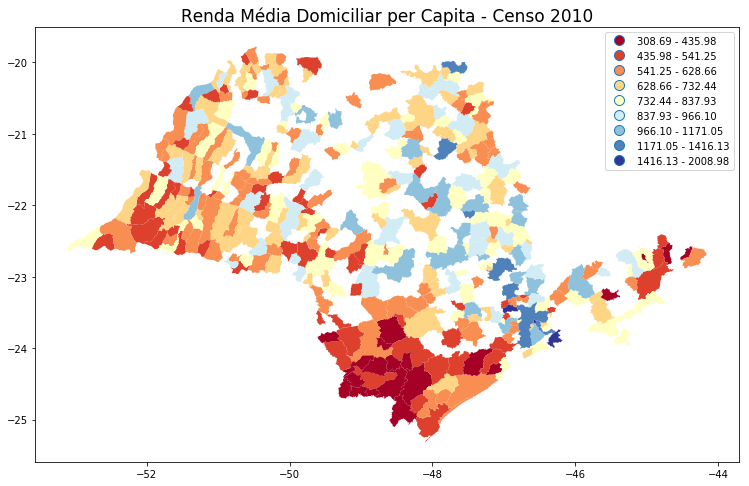

In [645]:
merged.plot(column = 'renda2010', figsize=(18,8),cmap='RdYlBu', scheme='fisher_jenks', k=9, legend=True)
plt.title('Renda Média Domiciliar per Capita - Censo 2010', fontsize = 17)

Text(0.5, 1.0, 'Divisão de Classes por Renda - Censo 2010')

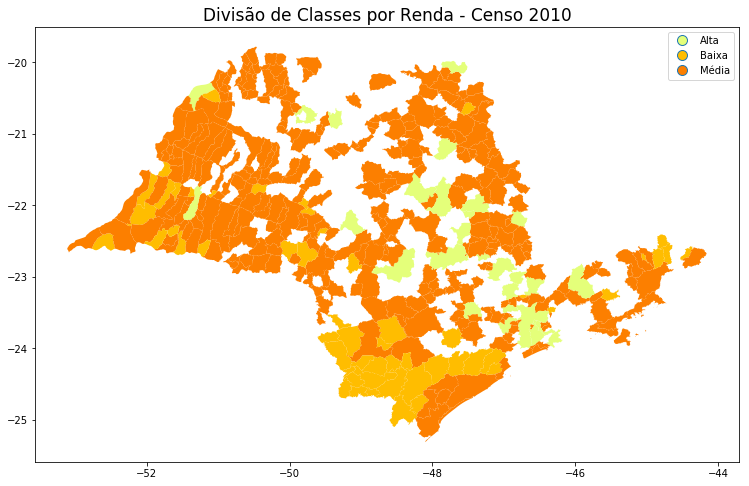

In [648]:
merged.plot(column = 'classe', figsize=(18,8),cmap='Wistia', legend=True)
plt.title('Divisão de Classes por Renda - Censo 2010', fontsize = 17)

Text(0.5, 1.0, 'Famílias atendidas/População em 2014')

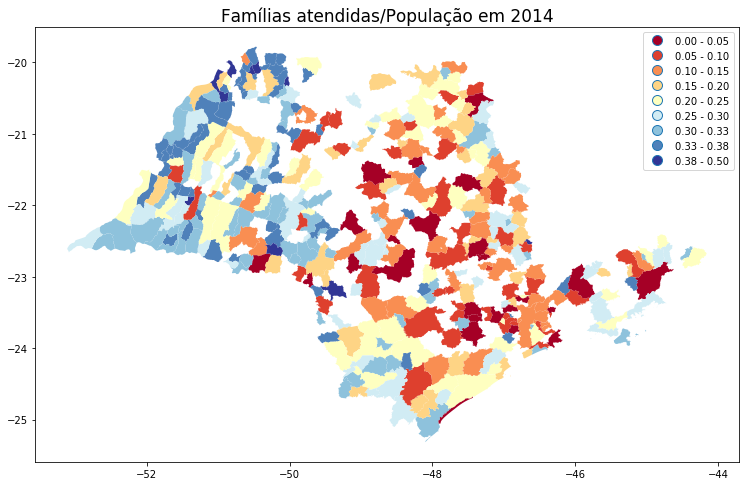

In [640]:
merged.plot(column = 'indfam2014', figsize=(18,8),cmap='RdYlBu', scheme='fisher_jenks', k=9, legend=True)
plt.title('Famílias atendidas/População em 2014', fontsize = 17)

Text(0.5, 1.0, 'Famílias atendidas/População em 2003 - Famílias atendidas/População em 2014')

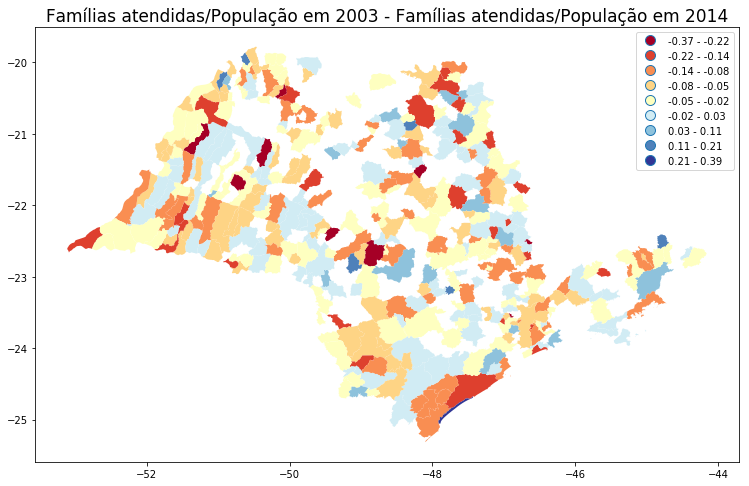

In [641]:
merged.plot(column = 'indice', figsize=(18,8),cmap='RdYlBu', scheme='fisher_jenks', k=9, legend=True)
plt.title('Famílias atendidas/População em 2003 - Famílias atendidas/População em 2014', fontsize = 17)

Text(0.5, 1.0, 'Índice de crescimento sobre famílias atendidas pela saúde da família entre 2003 e 2014')

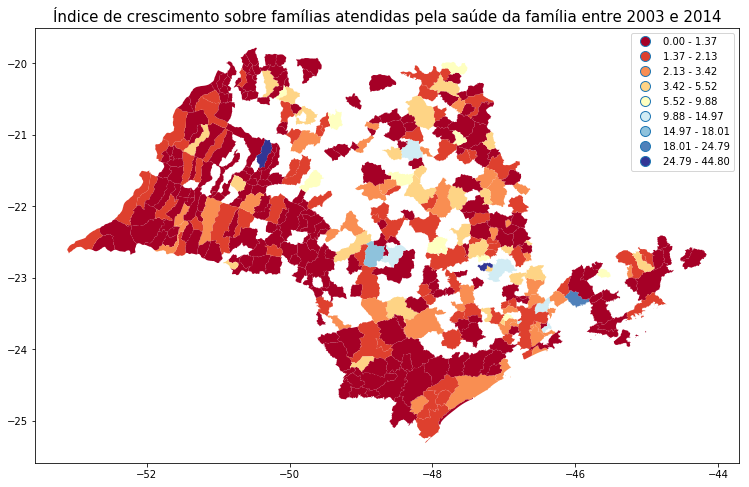

In [643]:
merged.plot(column = 'fam2014_2003', figsize=(18,8),cmap='RdYlBu', scheme='fisher_jenks', k=9, legend=True)
plt.title('Índice de crescimento sobre famílias atendidas pela saúde da família entre 2003 e 2014', fontsize = 15)

Text(0.5, 1.0, 'Índice de Crescimento Populacional Entre 2003 e 2014')

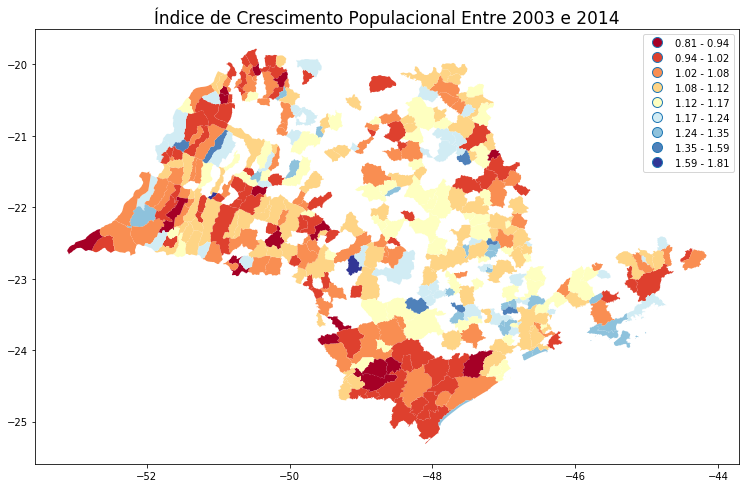

In [647]:
merged.plot(column = 'pop2014_2003', figsize=(18,8),cmap='RdYlBu', scheme='fisher_jenks', k=9, legend=True)
plt.title('Índice de Crescimento Populacional Entre 2003 e 2014', fontsize = 17)